<a href="https://colab.research.google.com/github/livjab/DS-Unit-2-Sprint-2-Regression/blob/master/module2-polynomial-log-linear-regression/polynomial-log-linear-regression-assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## Your model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv")
pd.set_option('display.max_columns', None)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


A number of features have the same categorical ranking that would be easy to turn into numeric and be able to include these columns in the model

       Ex	Excellent --> 5
       Gd	Good --> 4
       TA	Average/Typical --> 3
       Fa	Fair --> 2
       Po	Poor --> 1
       NA	--> 0

In [0]:
to_number = {"ExterQual": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0},
             "ExterCond": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0},
             "BsmtQual": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0},
             "BsmtCond": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0},
             "HeatingQC": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0},
             "KitchenQual": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0},
             "FireplaceQu": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0},
             "GarageQual": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0},
             "GarageCond": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0},
             "PoolQC": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0}
             }

In [0]:
df = df.replace(to_number)

cols = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC", 
              "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC"]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [0]:
target = "SalePrice"
numeric_columns = df.select_dtypes(include='number').columns


In [0]:
for feature in numeric_columns.drop(target):
    sns.scatterplot(x=feature, y=target, data=df, alpha=0.2)
    plt.show()

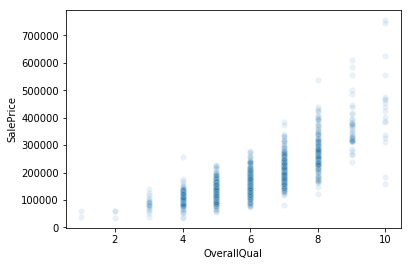

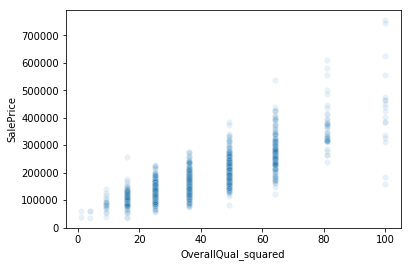

In [8]:
#making a squared feature for OverallQual

df["OverallQual_squared"] = df["OverallQual"]**2
for feature in ["OverallQual", "OverallQual_squared"]:
    sns.scatterplot(x=feature, y=target, data=df, alpha=0.1)
    plt.show()

In [0]:
# function for running the model

def run_linear_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
    r2 = r2_score(y_test, y_pred)

    print('Root Mean Squared Error', rmse)
    print('R^2 Score', r2)
    print('Intercept', model.intercept_)
    coefficients = pd.Series(model.coef_, X_train.columns)
    print(coefficients.to_string())

In [10]:
#baseline

features = ['OverallQual']
y = df[target]
X = df[features]

run_linear_model(X, y)

Root Mean Squared Error 51778.62651238531
R^2 Score 0.6504677778896863
Intercept -90233.22290028064
OverallQual    44379.877671


In [11]:
# bivariate using squared column

features = ["OverallQual_squared"]
y = df[target]
X = df[features]

run_linear_model(X, y)

Root Mean Squared Error 47889.17817113345
R^2 Score 0.7010070596792005
Intercept 39264.778410326835
OverallQual_squared    3613.824421


In [12]:
# multiple regression using both features

features = ["OverallQual", "OverallQual_squared"]
y = df[target]
X = df[features]

run_linear_model(X, y)

Root Mean Squared Error 46635.77592570267
R^2 Score 0.7164533114439823
Intercept 144664.1708952135
OverallQual           -34522.105042
OverallQual_squared     6306.341845


In [23]:
# trying a higher degree polynomial

df["OverallQual_cubed"] = df["OverallQual"]**3

features = ["OverallQual", "OverallQual_cubed"]
y = df[target]
X = df[features]

run_linear_model(X,y)

Root Mean Squared Error 46292.813879108624
R^2 Score 0.6805486945804604
Intercept 65572.6184792842
OverallQual          4829.996682
OverallQual_cubed     324.382255


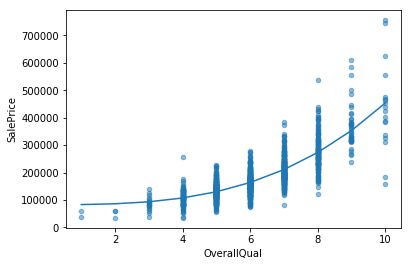

In [24]:
# want to see what this looks like

df = df.sort_values(by='OverallQual')

ax = df.plot(x='OverallQual', y=target, kind='scatter', alpha=0.5)
ax.plot(X['OverallQual'], model.predict(X));

In [25]:
# log transformed y

features = ["OverallQual"]
y = np.log(df[target])
X = df[features]

run_linear_model(X, y)

Root Mean Squared Error 0.2186896861336451
R^2 Score 0.6726355654895607
Intercept 10.595449956708853
OverallQual    0.234502


In [38]:
# more engineered features

df["yard"] = df["LotArea"] - df["1stFlrSF"]
df["age"] = np.subtract(2019, df["YearBuilt"])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,OverallQual_squared,OverallQual_cubed,yard,age
375,376,30,RL,NaN,10020,Pave,NaN,IR1,Low,AllPub,Inside,Sev,Edwards,Norm,Norm,1Fam,1Story,1,1,1922,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,2,2,BrkTil,2.0,1.0,Gd,BLQ,350,Unf,0,333,683,GasA,4,N,FuseA,904,0,0,904,1,0,0,1,1,1,2,4,Maj1,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal,61000,1,1,9116,97
533,534,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,Inside,Mod,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,2,N,FuseF,334,0,0,334,0,0,1,0,1,1,2,2,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,39300,1,1,4666,73
1100,1101,30,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1Story,2,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,3,CBlock,3.0,2.0,No,Rec,290,Unf,0,0,290,GasA,3,N,FuseF,438,0,0,438,0,0,1,0,1,1,2,3,Typ,0,NaN,Detchd,1930.0,Unf,1,246,3.0,3.0,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2009,WD,Normal,60000,4,8,7962,99
916,917,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,3,CBlock,3.0,3.0,Av,BLQ,50,Unf,0,430,480,GasA,3,N,FuseA,480,0,0,480,1,0,0,0,1,1,3,4,Typ,0,NaN,Detchd,1958.0,Unf,1,308,3.0,3.0,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,35311,4,8,8520,70
636,637,30,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,2,3,1936,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,2,2,BrkTil,3.0,2.0,No,Unf,0,Unf,0,264,264,Grav,2,N,FuseA,800,0,0,800,0,0,1,0,1,1,2,4,Maj1,1,1.0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2009,ConLw,Normal,60000,4,8,5320,83


In [0]:
df = df.fillna(value=0)


In [43]:
# put it all together

numeric_columns = df.select_dtypes(include='number').columns
features = numeric_columns.drop([target, 'SalePrice', 'Id'])

y = df[target]
X = df[features]

run_linear_model(X, y)

Root Mean Squared Error 26086.197360918333
R^2 Score 0.8721081364483577
Intercept -1305938239801651.5
MSSubClass            -1.665080e+02
LotFrontage           -4.620251e+01
LotArea               -1.053134e+14
OverallQual            8.084295e+01
OverallCond            7.310432e+03
YearBuilt              6.468243e+11
YearRemodAdd          -3.052830e+01
MasVnrArea             1.436170e+01
ExterQual              7.999099e+03
ExterCond             -6.802883e+03
BsmtQual               1.054438e+04
BsmtCond              -3.287353e+03
BsmtFinSF1            -1.831454e+12
BsmtFinSF2            -1.831454e+12
BsmtUnfSF             -1.831454e+12
TotalBsmtSF            1.831454e+12
HeatingQC              1.216688e+03
1stFlrSF               6.896490e+13
2ndFlrSF              -3.634852e+13
LowQualFinSF          -3.634852e+13
GrLivArea              3.634852e+13
BsmtFullBath           9.268769e+03
BsmtHalfBath           3.437106e+03
FullBath               6.206681e+03
HalfBath              -1.149416e+0

# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data